In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
all_death = pd.read_csv("../../data/orszagos_halott.csv", sep=',')[:755]
all_inf = pd.read_csv("../../data/orsz_fert.csv", sep=';')[:755]

In [8]:
#all_inf[181:181+160]["Hétnapos mozgóátlag"]

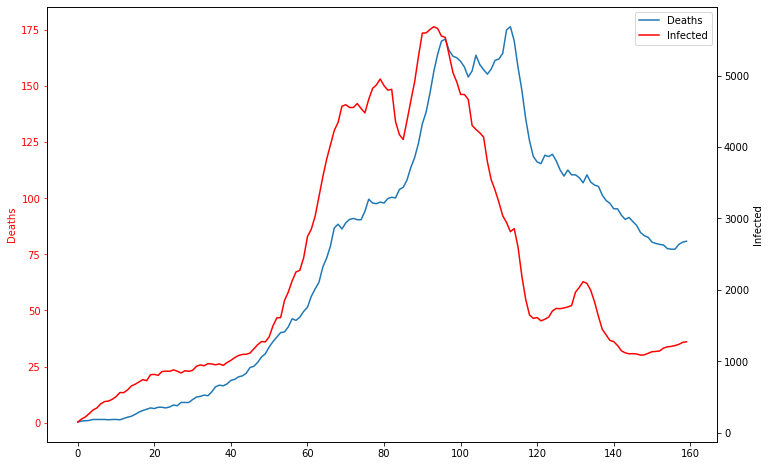

In [9]:
death = np.array(all_death[181:181+160]["Hétnapos mozgóátlag"])
inf = np.array([s.replace(',', '') for s in all_inf[181:181+160]["Hétnapos mozgóátlag"]], dtype=np.float32)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
lns1 = ax.plot(death, label="Deaths")
ax.set_ylabel("Deaths", c='r')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax2 = plt.gca().twinx()
lns2 = ax2.plot(inf, c="r", label="Infected")
ax2.set_ylabel("Infected")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

In [10]:
sum(inf[0:5]), inf[-1]

(1144.8571472167969, 1272.7142)

In [13]:
df = pd.read_csv("../../data/covid_deaths.csv", sep=';', header=None, index_col=0, names=["index", "sex", "age", "sickness"])
df = df.iloc[::-1]

In [14]:
df

,sex,age,sickness
index,,,
1,Nő,76,szív és érrendszeri
2,Nő,65,rosszindulatú daganat
3,Férfi,74,szív és érrendszeri
4,Férfi,79,szív és érrendszeri
5,Férfi,68,szív és érrendszeri
...,...,...,...
45466,Férfi,77,"kóros elhízás, demencia, magasvérnyomás-betegs..."
45467,Férfi,85,"magasvérnyomás-betegség, iszkémiás szívbetegsé..."
45468,Férfi,75,daganatos megbetegedés


In [15]:
bins = list(range(0,75,5))
bins

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

Text(0.5, 1.0, 'Death ratio in age groups')

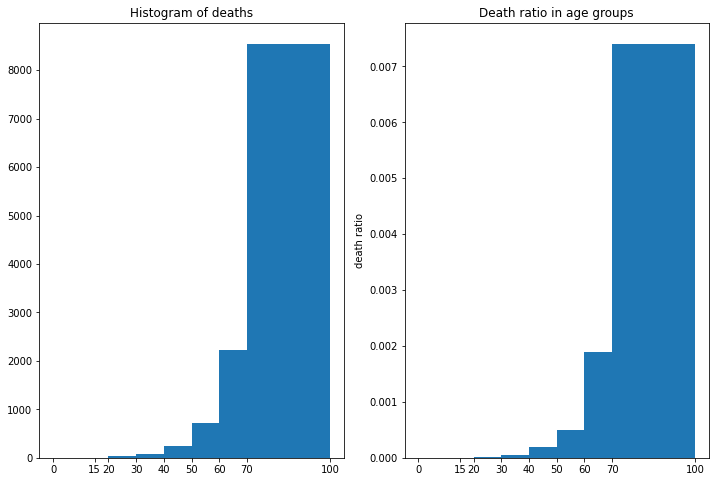

In [16]:
begin_death = all_death[:181]["Az új elhunytak száma naponta"].sum().astype(int)
end_death = all_death[181:181+160]["Az új elhunytak száma naponta"].sum().astype(int)

#bins = list(range(0,80,5))+[100]
bins=[0,15,20, 30,40,50,60,70, 100]

age_groups = np.array([1447659 , 593534 , 1229536 , 1580913 , 1316193 , 1438682 , 1176962 , 1154149 ])
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax.hist(df[begin_death:end_death]['age'], bins=bins)
ax.set_title("Histogram of deaths")
ax.set_xticks(bins)

ax = fig.add_subplot(122)
hist, edges = np.histogram(np.array(df[begin_death:end_death]['age']), bins=bins)
ax.bar(edges[0:-1], hist/age_groups, width=edges[1:]-edges[:-1], align='edge')
ax.set_xticks(edges[:])
ax.set_ylabel("death ratio")
ax.set_title("Death ratio in age groups")

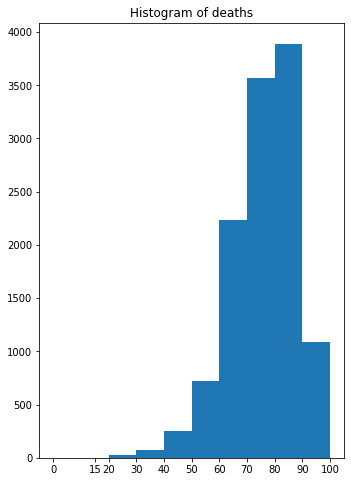

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax.hist(df[begin_death:end_death]['age'], bins=[0,15,20, 30,40,50,60,70,80,90, 100])
ax.set_title("Histogram of deaths")
ax.set_xticks([0,15,20, 30,40,50,60,70,80,90, 100]);

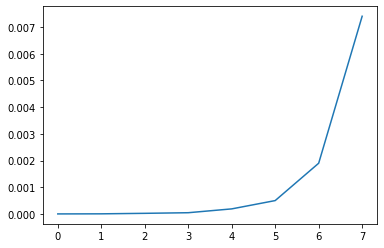

In [18]:
death_ratio = hist/age_groups
plt.plot(death_ratio)

In [19]:
print(death_ratio)

[0.00000000e+00 3.36964689e-06 2.19595034e-05 4.49107573e-05
 1.88422215e-04 4.99762978e-04 1.89895681e-03 7.40632275e-03]


In [20]:
len(death_ratio), death_ratio.shape

(8, (8,))

In [23]:
def get_inf_curve(filename, death = None, K=8):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    
    I = np.zeros((150, K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    
    I = np.sum(I, axis=2)
    if type(death) != None:
        return np.sum(I*death, axis=1), Is.sum(axis=1)
    else:
        return Is.sum(axis=1)

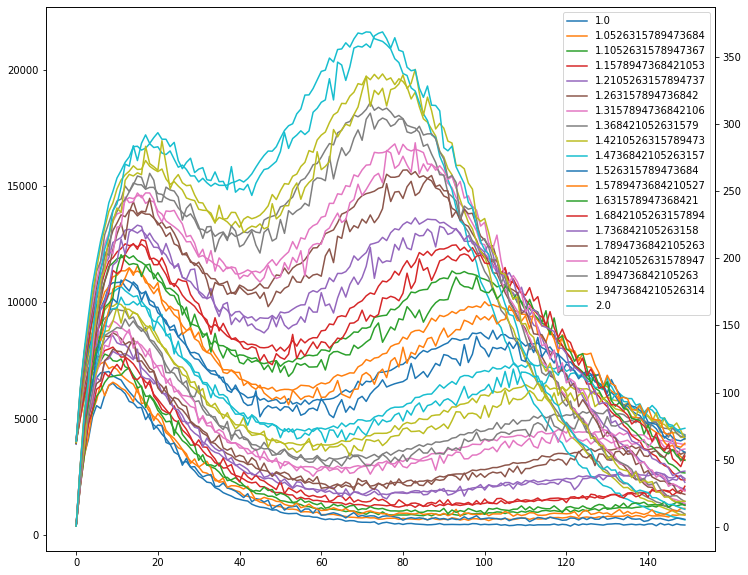

In [35]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
ax2 = ax.twinx()

for i,R0 in zip(range(20)[:], np.linspace(1.0, 2.0, 20)[:]):
    #death, Is = get_inf_curve(f"../output/R0_bp/{i}.txt", death = 0.5*np.ones(8))
    death, Is = get_inf_curve(f"../output/R0_bp/{i}.txt", death = np.array(death_ratio))
    ax.plot(Is, label=str(R0))
    ax2.plot(death, label=str(R0))
    
plt.legend()

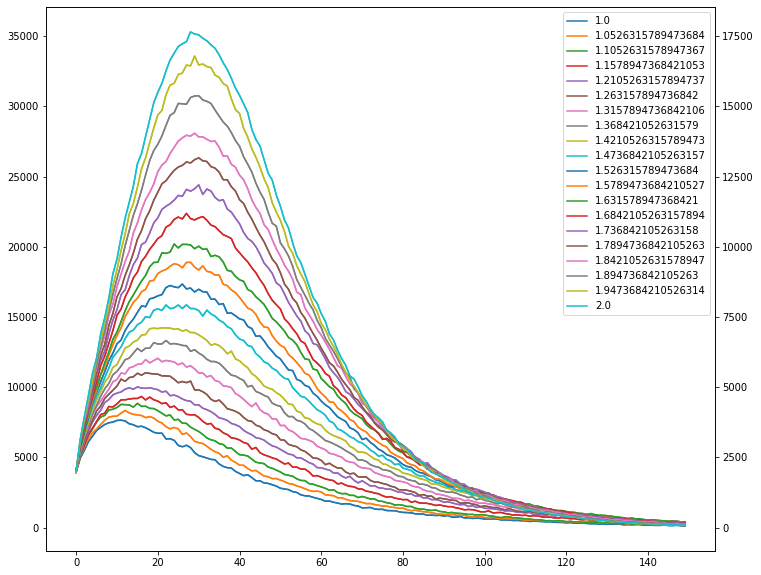

In [27]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
ax2 = ax.twinx()

for i,R0 in zip(range(20)[:], np.linspace(1.0, 2.0, 20)[:]):
    death, Is = get_inf_curve(f"../output/R0_all/{i}.txt", death = 0.5*np.ones(8))
    #death, Is = get_inf_curve(f"../output/R0_bp/{i}.txt", death = np.array(death_ratio)*10)
    ax.plot(Is, label=str(R0))
    ax2.plot(death, label=str(R0))
    
plt.legend()

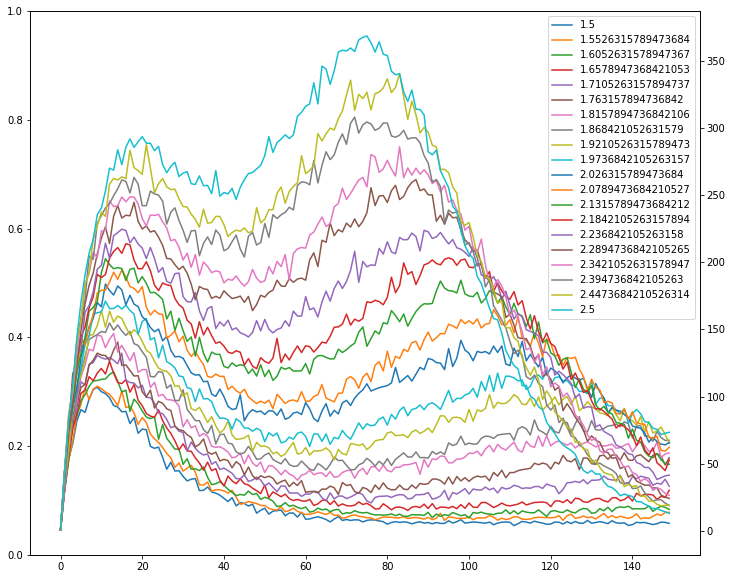

In [33]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
ax2 = ax.twinx()

for i,R0 in zip(range(20)[:], np.linspace(1.5, 2.5, 20)[:]):
    #death, Is = get_inf_curve(f"../output/R0_all/{i}.txt", death = 0.5*np.ones(8))
    death, Is = get_inf_curve(f"../output/R0_bp/{i}.txt", death = np.array(death_ratio))
    #ax.plot(Is, label=str(R0))
    ax2.plot(death, label=str(R0))
    
plt.legend()

# Simulations

In [189]:
base_args = {
    "--config": "../input/hun",
    "--out": "../output/sim/temp.txt",
    "--maxT": "150",
    "--c": "0.05"
}

global_args = {
    "procnum": 20,
}

In [190]:
import os
import copy
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from subprocess import Popen, STDOUT, PIPE

def run(args, job_count, lock):
    # Run
    str_args = [str(item) for pair in args.items() for item in pair]
    #print(" ".join([ "../bin/main"] + str_args))
    p = Popen([ "../bin/main"] + str_args,
          stdout=PIPE, stdin=PIPE, stderr=STDOUT, bufsize=1, universal_newlines=True)

    out,err = p.communicate()
    #print(out)
    
    # Alert master, if ready
    with lock:
        job_count[0]+=1
        print('\r {}/{}'.format(job_count[0], job_count[1]), end='', flush=True)

    return 0

def measure(meas_name, arg_name, arg_space):
    # Init pool
    pool = multiprocessing.Pool(processes=global_args["procnum"])
    manager = multiprocessing.Manager()
    lock = manager.Lock()
    job_count = manager.Array("i", [0,len(arg_space)])
    
    os.makedirs(f"../output/{meas_name}", exist_ok=True)
    
    # Run async
    sims = {}
    for i,x in enumerate(arg_space):
        if type(x)==str:
            pass
        else:
            x = np.round_(x, decimals=4)
        args = copy.copy(base_args)
        args["--out"]=f"../output/{meas_name}/{i}.txt"
        args[arg_name]=f"{x}"
        #sims[(x,args["--out"])] = None
        sims[(x,args["--out"])] = pool.apply_async(run, args =(args, job_count, lock))
    
    # Collect async
    for k,v in sims.items():
        v.get()
    
    pool.close()
    pool.join()
    
    return sims.keys()

def convert_ages(arr):
    # Split first age into 3
    ret = [arr[0], arr[0], arr[0]]
    # Then split the others into 2 category
    for e in arr[1:-1]:
        ret += [e,e]
    # Finally add the last
    ret += [arr[-1]]
    return ret

def get_inf_curve(filename, death = None):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    
    I = np.zeros((150, 16, len(Is.columns)//16))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    
    I = np.sum(I, axis=2)
    if type(death) != None:
        return np.sum(I*death, axis=1), Is.sum(axis=1)
    else:
        return Is.sum(axis=1)

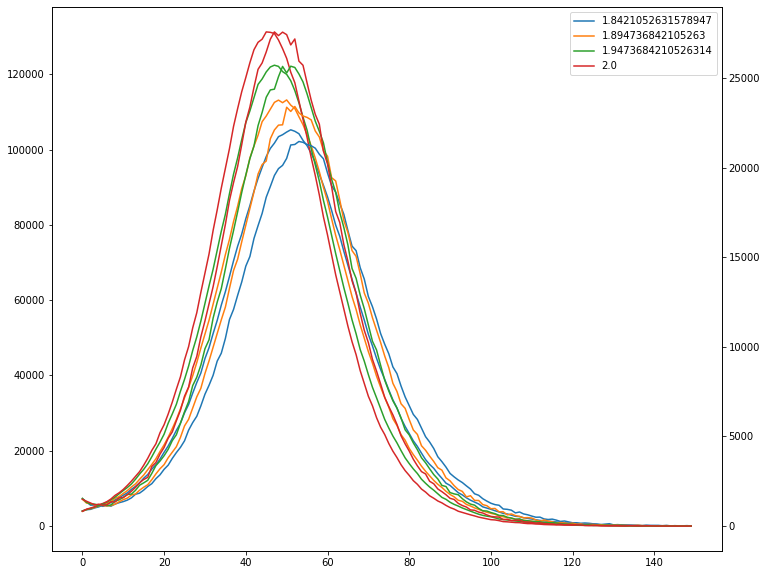

In [206]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
ax2 = ax.twinx()

for i,R0 in zip(range(20)[16:], np.linspace(1.0, 2.0, 20)[16:]):
    #death, Is = get_inf_curve(f"../output/R0/{i}.txt", death = 0.5*np.ones(16))
    death, Is = get_inf_curve(f"../output/R0/{i}.txt", death = convert_ages(death_ratio*10))
    ax.plot(Is, label=str(R0))
    ax2.plot(death, label=str(R0))
    
plt.legend()

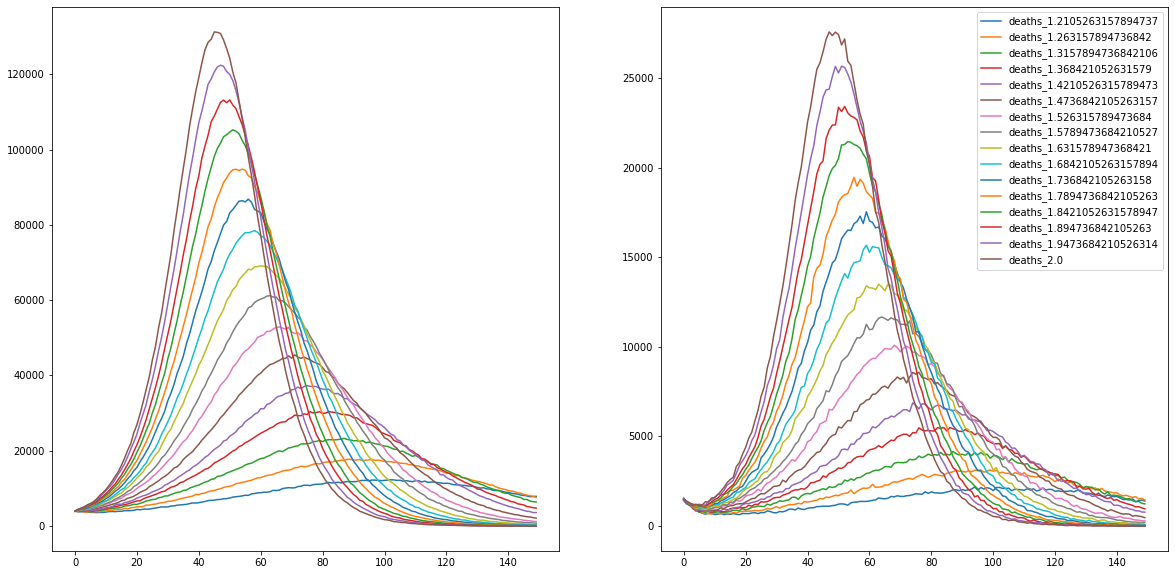

In [217]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

for i,R0 in zip(range(20)[4:], np.linspace(1.0, 2.0, 20)[4:]):
    #death, Is = get_inf_curve(f"../output/R0/{i}.txt", death = 0.5*np.ones(16))
    death, Is = get_inf_curve(f"../output/R0/{i}.txt", death = convert_ages(death_ratio*10))
    axs[0].plot(Is, label=str(R0))
    axs[1].plot(death, label="deaths_"+str(R0))
    
plt.legend()


In [148]:
#sims_R0 = measure("R0", "--R0", np.linspace(1.0, 2.0, 20))

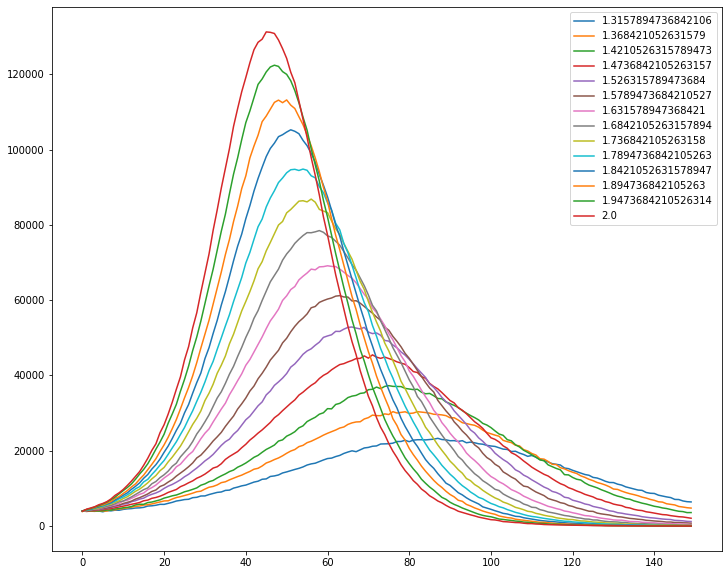

In [142]:
plt.figure(figsize=(12,10))
for i,R0 in zip(range(20)[6:], np.linspace(1.0, 2.0, 20)[6:]):
    plt.plot(get_inf_curve(f"../output/R0/{i}.txt"), label=str(R0))
    
plt.legend()

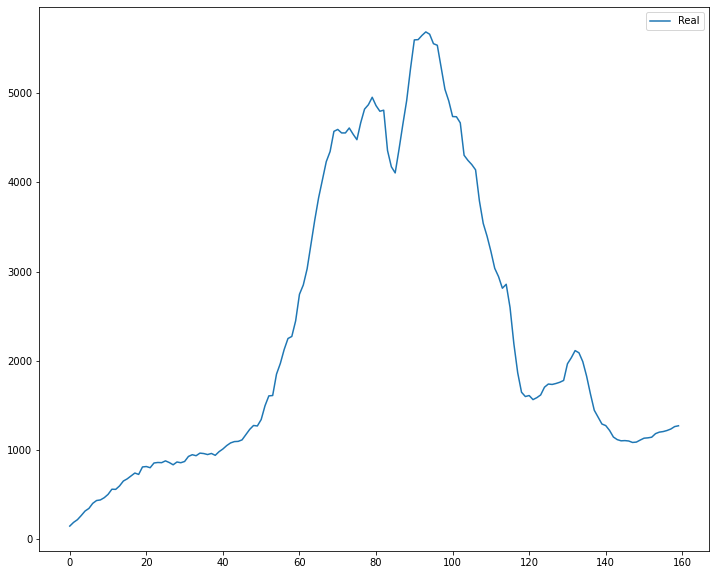

In [11]:
plt.figure(figsize=(12,10))
plt.plot(inf, label="Real")

for val,file in sims_R0:
    if(val < 0.3):
        plt.plot(get_inf_curve(file), label=f"c={val}")
plt.legend()